In [67]:
library(dplyr)
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# 데이터셋

In [3]:
exams <- read.csv("~/Dropbox/coco/posts/Applied statistics/exams.csv")
head(exams)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group D,some college,standard,completed,59,70,78
2,male,group D,associate's degree,standard,none,96,93,87
3,female,group D,some college,free/reduced,none,57,76,77
4,male,group B,some college,free/reduced,none,70,70,63
5,female,group D,associate's degree,standard,none,83,85,86
6,male,group C,some high school,standard,none,68,57,54


In [8]:
summary(exams)

    gender          race.ethnicity     parental.level.of.education
 Length:1000        Length:1000        Length:1000                
 Class :character   Class :character   Class :character           
 Mode  :character   Mode  :character   Mode  :character           
                                                                  
                                                                  
                                                                  
    lunch           test.preparation.course   math.score     reading.score   
 Length:1000        Length:1000             Min.   : 15.00   Min.   : 25.00  
 Class :character   Class :character        1st Qu.: 58.00   1st Qu.: 61.00  
 Mode  :character   Mode  :character        Median : 68.00   Median : 70.50  
                                            Mean   : 67.81   Mean   : 70.38  
                                            3rd Qu.: 79.25   3rd Qu.: 80.00  
                                            Max.   :100.00   Ma

In [72]:
data <- filter(exams,race.ethnicity== 'group E')
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group E,associate's degree,standard,none,82,83,80
2,male,group E,master's degree,free/reduced,none,56,46,43
3,female,group E,associate's degree,free/reduced,none,80,82,85
4,male,group E,associate's degree,standard,none,89,88,86
5,female,group E,associate's degree,standard,none,80,79,71
6,female,group E,some college,free/reduced,none,69,74,75



`-` [데이터: Kaggle의 exams 데이터](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

- group E의 아래 두 데이터 상관관계를 보고자 함

- Reading score: The student's score on a standardized reading test

- Writing score: The student's score on a standardized writing test

In [73]:
nrow(data)
ncol(data)

[1] 143

[1] 8

# 산점도

In [43]:
dt <- data.frame(
  i = 1:nrow(data),
  x = data$reading.score,
  y = data$writing.score,
  x_barx = data$reading.score - mean(data$reading.score),
  y_bary = data$writing.score - mean(data$writing.score)) 
head(dt)


,i,x,y,x_barx,y_bary
,<int>,<int>,<int>,<dbl>,<dbl>
1,1,83,80,6.384615,4.96503497
2,2,46,43,-30.615385,-32.03496503
3,3,82,85,5.384615,9.96503497
4,4,88,86,11.384615,10.96503497
5,5,79,71,2.384615,-4.03496503
6,6,74,75,-2.615385,-0.03496503


In [42]:
dt$x_barx2 <- dt$x_barx^2
dt$y_bary2 <- dt$y_bary^2
dt$x_barxy_bary <-dt$x_barx * dt$y_bary
head(dt)

,i,x,y,x_barx,y_bary,x_barx2,y_bary2,x_barxy_bary
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,83,80,6.384615,4.96503497,40.763314,2.465157e+01,31.69983862
2,2,46,43,-30.615385,-32.03496503,937.301775,1.026239e+03,980.76277569
3,3,82,85,5.384615,9.96503497,28.994083,9.930192e+01,53.65788058
4,4,88,86,11.384615,10.96503497,129.609467,1.202320e+02,124.83270576
5,5,79,71,2.384615,-4.03496503,5.686391,1.628094e+01,-9.62183970
6,6,74,75,-2.615385,-0.03496503,6.840237,1.222554e-03,0.09144701


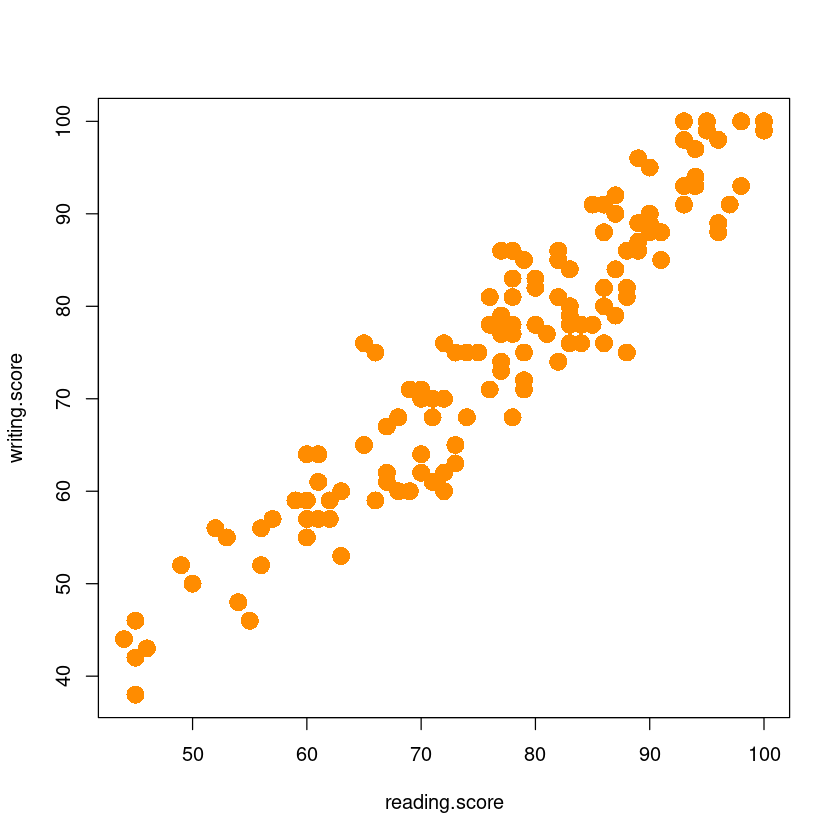

In [35]:

plot(y~x,
     data=dt,
     xlab="reading.score",
     ylab="writing.score",
     pch=16,
     cex=2,
     col="darkorange")


- 양의 상관관계가 있어 보인다.

# 회귀직선

In [36]:
model_ <- lm(y~x,dt)
model_


Call:
lm(formula = y ~ x, data = dt)

Coefficients:
(Intercept)            x  
     -2.506        1.012  


$\widehat y =-2.506 + 1.012  x$

In [77]:
summary(model_)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5572  -3.4544   0.3703   3.3341  12.7208 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.5063     2.2880  -1.095    0.275    
x             1.0121     0.0294  34.419   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.778 on 141 degrees of freedom
Multiple R-squared:  0.8936,	Adjusted R-squared:  0.8929 
F-statistic:  1185 on 1 and 141 DF,  p-value: < 2.2e-16


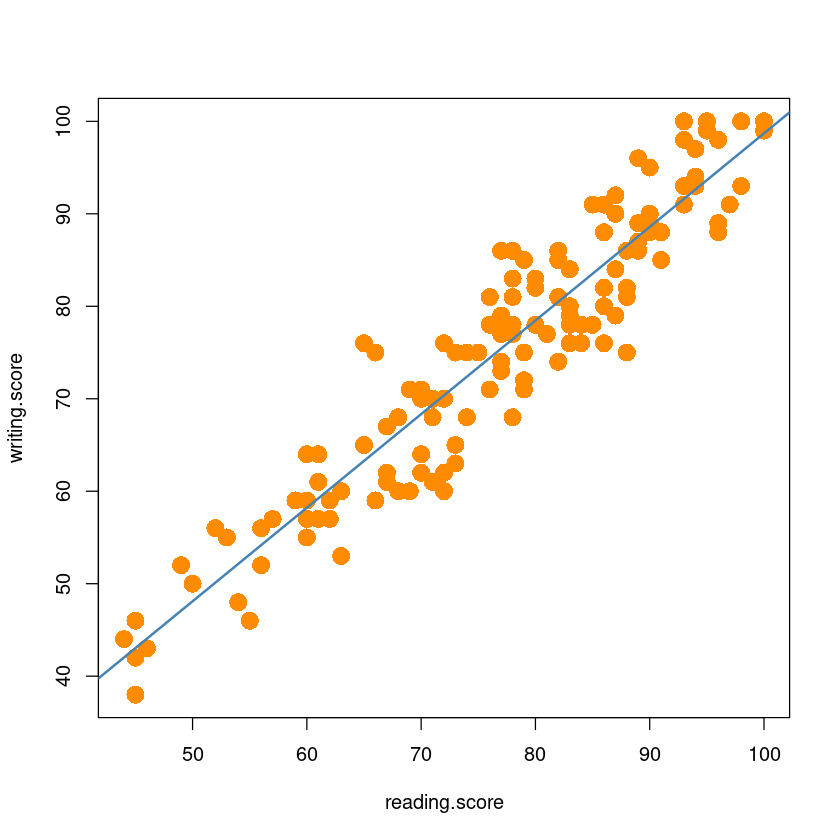

In [38]:

plot(y~x,
     data=dt,
     xlab="reading.score",
     ylab="writing.score",
     pch=16,
     cex=2,
     col="darkorange")


abline(model_, col='steelblue', lwd=2)

# 분산분석

In [39]:
anova(model_)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,27045.856,27045.85588,1184.685,1.731866e-70
Residuals,141,3218.969,22.82957,NA,NA


- 가정: $H_0: \beta_1 = 0$ vs $H_1: \beta_1 \neq 0$

In [40]:
qf(0.95,1,141)

[1] 3.908258

- $F_0 > F_{0.05}(0.95,1,141) = 3.91$ 이므로 귀무가설을 기각할 수 잇다. 즉 회귀직선이 유의하다.

# 결정계수, 상관계수

In [41]:
summary(model_)$r.squared

[1] 0.8936399

In [44]:
Sxy <- sum((dt$x - mean(dt$x))*(dt$y - mean(dt$y)))
Sxx <- sum((dt$x - mean(dt$x))^2)
Syy <- sum((dt$y - mean(dt$y))^2)

In [45]:
rxy<-Sxy/sqrt(Sxx*Syy)

In [46]:
rxy**2

[1] 0.8936399

# 개별 회귀계수 유의성 검정

$β_0, β_1$에 대한 개별 회귀계수의 유의성검정을 수행하시오.

가설 $H_0: \beta_1 = 0$ vs $H_1: not H_0$

In [48]:
summary(model_)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.506277,2.2880027,-1.09540,2.752092e-01
x,1.012084,0.0294046,34.41926,1.731866e-70


In [49]:
qt(0.975,141)

[1] 1.976931

$\beta_0$의 t-value= -1.09540 < 1.97693148863425 이므로 귀무가설을 기각할 수 없다. 

# 신뢰구간

In [51]:
confint(model_, level=0.9)

,5 %,95 %
(Intercept),-6.2945971,1.282043
x,0.9633983,1.060771


# 평균반응

reading score가 61.2 인 학생의 평균 wiring score 예측하고, 95% 신뢰구간을 구하시오.

In [52]:
new_score <- data.frame(x=61.2)

`-` 코드

In [53]:
model_$coefficients[1] + model_$coefficients[2]*61.2

(Intercept) 
   59.43329

In [54]:
predict(model_, 
        newdata = new_score,
        interval = c("confidence"),  #구간추정
        level = 0.95)  ##평균반응

,fit,lwr,upr
1,59.43329,58.23874,60.62785


# 개별 y

reading score가 61.2 인 학생의 개별 wiring score 예측하고, 95% 신뢰구간을 구하시오.

In [56]:
predict(model_, newdata = new_score, 
        interval = c("prediction"),  
        level = 0.95)  ## 개별 y

,fit,lwr,upr
1,59.43329,49.91222,68.95437


# 잔차

In [61]:
data$yhat <- model_$fitted
data$resid <- model_$residuals

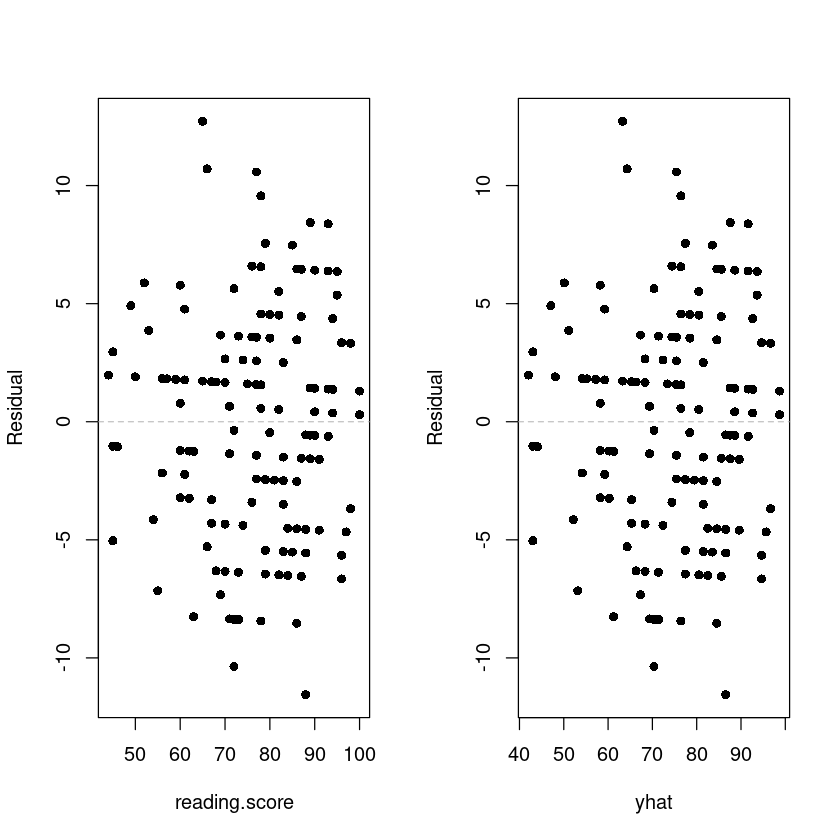

In [64]:
par(mfrow=c(1,2))
plot(resid ~ reading.score, data, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')
plot(resid ~ yhat, data, pch=16, ylab = 'Residual')
abline(h=0, lty=2, col='grey')

In [68]:
bptest(model_)


	studentized Breusch-Pagan test

data:  model_
BP = 0.057101, df = 1, p-value = 0.8111


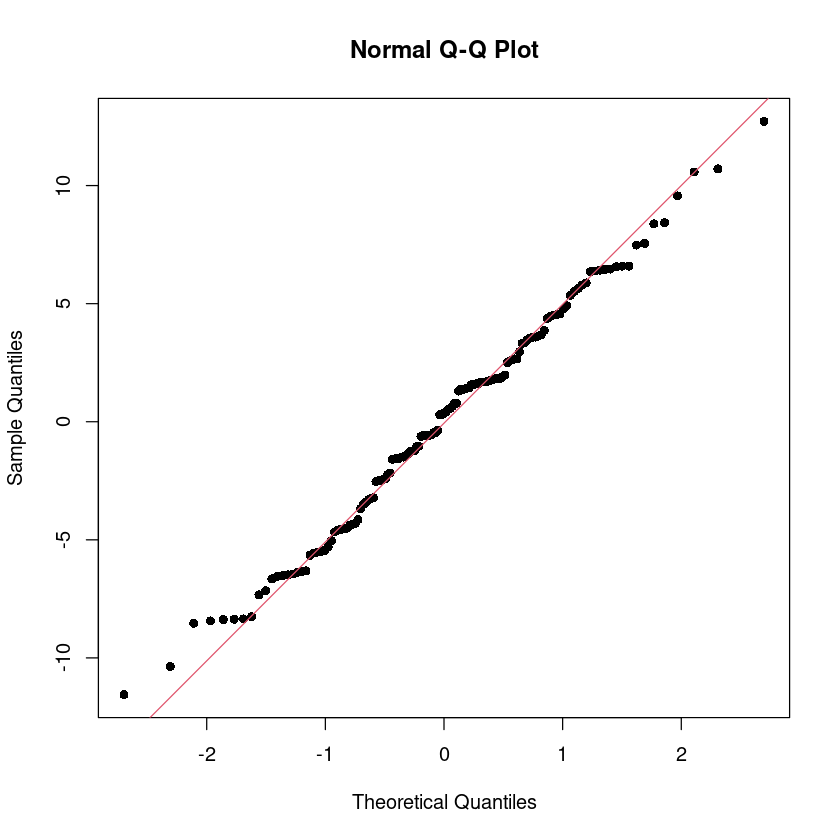

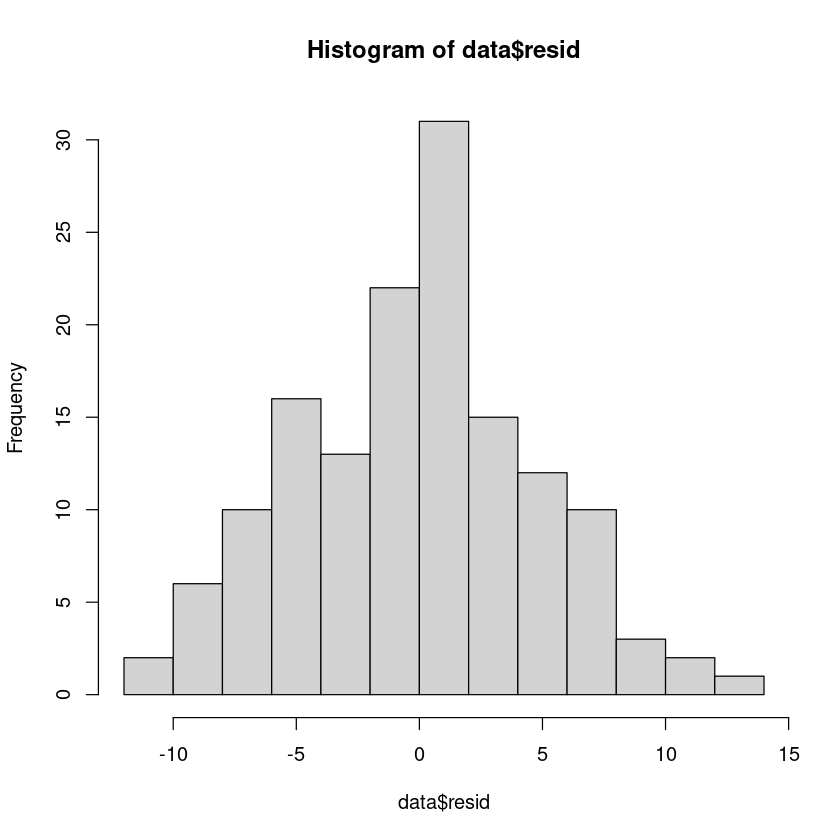

In [69]:
qqnorm(data$resid, pch=16)
qqline(data$resid, col=2)
hist(data$resid)

In [70]:
shapiro.test(resid(model_))


	Shapiro-Wilk normality test

data:  resid(model_)
W = 0.9925, p-value = 0.6551


- $H_0$: 정규성 만족, $H_1$: 정규성만족X

- p-value의 값이 0.05 보다 크므로 귀무가설 채택. 즉 정규성 가정을 만족한다.

In [71]:
dwtest(model_, alternative = "two.sided") 


	Durbin-Watson test

data:  model_
DW = 2.1808, p-value = 0.275
alternative hypothesis: true autocorrelation is not 0


- H0 : uncorrelated vs H1 : rho != 0

p-value값이 0.275로 0.05보다 크므로 독립성을 먼족한다.